In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("detailed_player_data.csv")

# Display column names and first few rows
# print(df.head())

def assign_role(row):
    if row['stumps'] > 0 or row['catches'] >= 3:  # Wicketkeeper (WK)
        return "WK"
    elif row['runs'] > 50 and row['wickets'] >= 2:  # All-Rounder (AR)
        return "AR"
    elif row['runs'] > 100 and row['wickets'] <= 1:  # Batter (BAT)
        return "BAT"
    elif row['wickets'] >= 2:  # Bowler (BOWL)
        return "BOWL"
    else:
        return "Unknown"

df['Role'] = df.apply(assign_role, axis=1)

print(df[['runs', 'wickets', 'stumps', 'catches', 'Role']].head(10))

df.to_csv("detailed_player_data_with_roles.csv", index=False)
print("Dataset updated with 'Role' column and saved as 'detailed_player_data_with_roles.csv'")



   runs  wickets  stumps  catches Role
0   264        0       0        0  BAT
1   215        2       0        1   AR
2   237        0       0        2  BAT
3   185        1       0        2  BAT
4   210        0       0        0  BAT
5   219        0       0        0  BAT
6   209        0       0        0  BAT
7   175        2       0        0   AR
8   208        0       0        1  BAT
9   208        0       0        1  BAT
Dataset updated with 'Role' column and saved as 'detailed_player_data_with_roles.csv'


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         52031 non-null  int64  
 1   player           52031 non-null  object 
 2   team             52031 non-null  object 
 3   runs             52031 non-null  int64  
 4   balls_faced      52031 non-null  int64  
 5   fours            52031 non-null  int64  
 6   sixes            52031 non-null  int64  
 7   wickets          52031 non-null  int64  
 8   overs_bowled     52031 non-null  int64  
 9   balls_bowled     52031 non-null  int64  
 10  runs_conceded    52031 non-null  int64  
 11  catches          52031 non-null  int64  
 12  run_outs         52031 non-null  int64  
 13  maiden           52031 non-null  int64  
 14  stumps           52031 non-null  int64  
 15  match_outcome    52031 non-null  object 
 16  opposition_team  52031 non-null  object 
 17

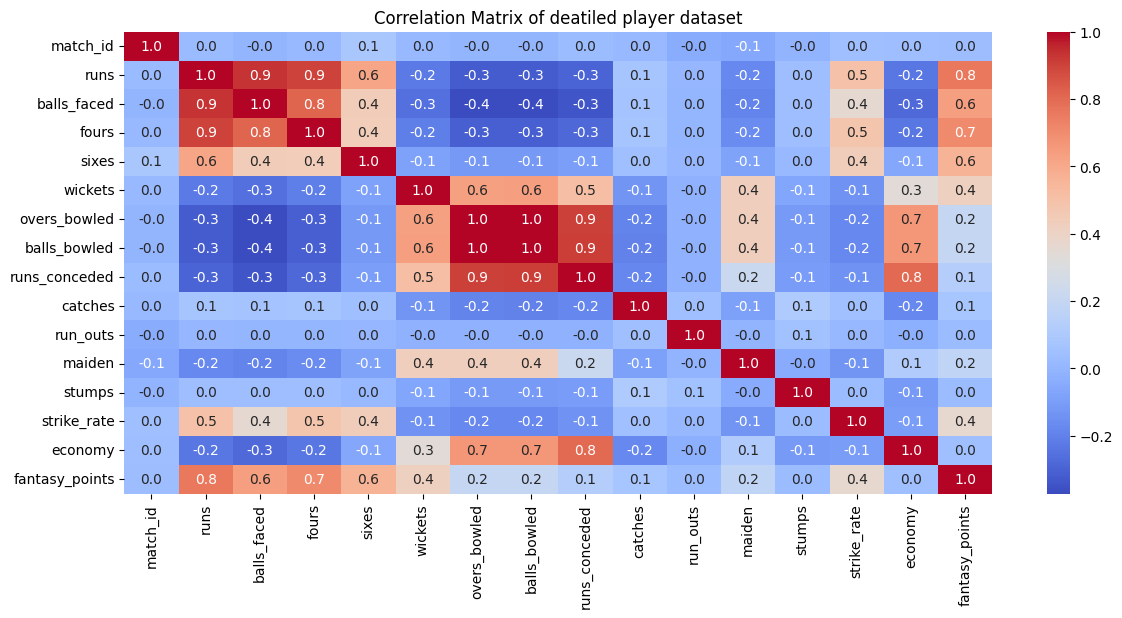

Best Playing XI based on Fantasy Points:
            player  Role          team  fantasy_points
11       Q de Kock    WK  South Africa             418
1         CH Gayle    AR   West Indies             511
7       AK Markram    AR  South Africa             435
13      MP Stoinis    AR     Australia             409
0        RG Sharma   BAT         India             540
2       MJ Guptill   BAT   New Zealand             505
3        SR Watson   BAT     Australia             480
4     Ishan Kishan   BAT         India             456
237      AJ Bichel  BOWL     Australia             281
388       IS Sodhi  BOWL   New Zealand             257
429       M Jansen  BOWL  South Africa             251
474  Shahid Afridi  BOWL      Pakistan             247


In [14]:
df = pd.read_csv("detailed_player_data_with_roles.csv")
print("Dataset Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())


numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("\nCorrelation:")
print(correlation_matrix)
# plt.tight_layout()

#heat map
# Plot the correlation matrix
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix of deatiled player dataset")
plt.show()

top_WK = df[df['Role'] == 'WK'].sort_values(by='fantasy_points', ascending=False).head(1)
top_AR = df[df['Role'] == 'AR'].sort_values(by='fantasy_points', ascending=False).head(3)
top_BAT = df[df['Role'] == 'BAT'].sort_values(by='fantasy_points', ascending=False).head(4)
top_BOWL = df[df['Role'] == 'BOWL'].sort_values(by='fantasy_points', ascending=False).head(4)

# Combine them to form the best XI
best_XI = pd.concat([top_WK, top_AR, top_BAT, top_BOWL])
print("Best Playing XI based on Fantasy Points:")
print(best_XI[['player', 'Role', 'team','fantasy_points']])



Correlation:
                   number   Matches      Runs  Highest Score  Batting Average  \
number           1.000000 -0.210059 -0.251477      -0.256073        -0.135255   
Matches         -0.210059  1.000000  0.800460       0.435938         0.220597   
Runs            -0.251477  0.800460  1.000000       0.780599         0.571174   
Highest Score   -0.256073  0.435938  0.780599       1.000000         0.867599   
Batting Average -0.135255  0.220597  0.571174       0.867599         1.000000   
Strike Rate      0.108601 -0.124585 -0.041218       0.185649         0.168082   
50s             -0.199091  0.800072  0.971909       0.699718         0.555018   
100s            -0.223047  0.601479  0.919690       0.752385         0.553150   
Wickets         -0.176099  0.364274 -0.083856      -0.169339        -0.365791   
Bowling Average -0.240613  0.240397  0.298627       0.107710        -0.079507   
Catches         -0.211784  0.819248  0.788152       0.570625         0.350521   
Run_conceded  

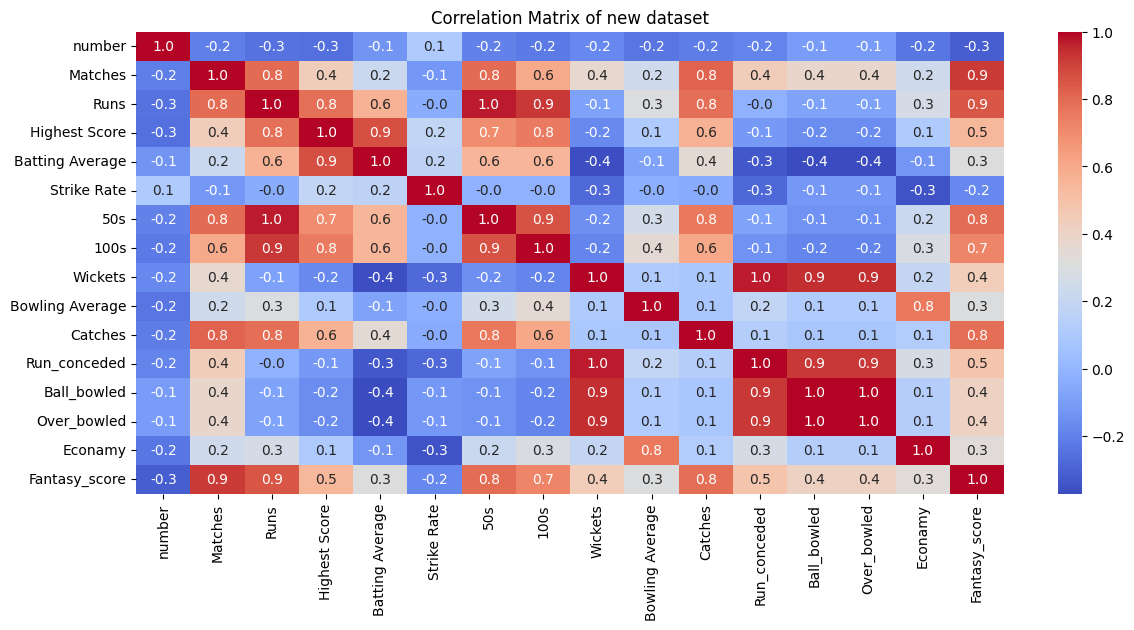

            Feature  Importance
1           Matches    0.504899
2              Runs    0.191534
10          Catches    0.181802
11     Run_conceded    0.079974
8           Wickets    0.016131
0              Team    0.008191
5       Strike Rate    0.005408
7              100s    0.003186
12      Ball_bowled    0.003084
6               50s    0.002648
14          Econamy    0.001252
4   Batting Average    0.000955
9   Bowling Average    0.000813
3     Highest Score    0.000103
15             Role    0.000019
13      Over_bowled    0.000000
          Player Name  Team  Role  Fantasy_score  Predicted_Fantasy_Score
17        virat kohli   4.0     1          16623             16622.990234
15       rohit sharma   4.0     1          12805             12805.005859
0         Steve Smith   0.0     1          11473             11472.998047
34    Mushfiqur Rahim   2.0     3          10265             10264.997070
4      Mitchell Starc   0.0     2          10043             10042.988281
1        Dav

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("playing11_with_roles.csv")


# Selecting top players based on Fantasy Score
top_WK = df[df["Role"] == "Wicketkeeper"].sort_values(by="Fantasy_score", ascending=False).head(1)
top_AR = df[df["Role"] == "All-rounder"].sort_values(by="Fantasy_score", ascending=False).head(3)
top_BAT = df[df["Role"] == "Batsman"].sort_values(by="Fantasy_score", ascending=False).head(4)
top_BOWL = df[df["Role"] == "Bowler"].sort_values(by="Fantasy_score", ascending=False).head(4)

# # Combine them to form the best XI
# best_XI = pd.concat([top_WK, top_AR, top_BAT, top_BOWL])
# print("Best Playing XI based on Fantasy Points:")
# print(best_XI[['Team', 'Player Name', 'Role','Fantasy_score']])

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("\nCorrelation:")
print(correlation_matrix)
#heat map
# Plot the correlation matrix
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix of new dataset")
plt.show()

# Ordinal Encoding for "Team"
team_encoder = OrdinalEncoder()
df['Team'] = team_encoder.fit_transform(df[['Team']])

# Label Encoding for "Role"
role_encoder = LabelEncoder()
df['Role'] = role_encoder.fit_transform(df['Role'])

# Display first few rows after encoding
# print(df.head(5))

import xgboost as xgb

# Define features (excluding Player Name and number)
X = df.drop(columns=["number", "Player Name", "Fantasy_score"])
y = df["Fantasy_score"]

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

# Predict fantasy scores using the trained model
df["Predicted_Fantasy_Score"] = model.predict(X)

# Sort players based on predicted fantasy score
best_playing_11 = df.sort_values(by="Predicted_Fantasy_Score", ascending=False).head(11)

# Display the best playing 11
print(best_playing_11[["Player Name", "Team", "Role","Fantasy_score", "Predicted_Fantasy_Score"]])



In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("playing11_with_roles.csv")

# Ordinal Encoding for "Team"
team_encoder = OrdinalEncoder()
df["Team"] = team_encoder.fit_transform(df[["Team"]])

# Label Encoding for "Role"
role_encoder = LabelEncoder()
df["Role"] = role_encoder.fit_transform(df["Role"])

# Define features (excluding Player Name and number)
X = df.drop(columns=["number", "Player Name", "Fantasy_score"])
y = df["Fantasy_score"]

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

# Predict fantasy scores using the trained model
df["Predicted_Fantasy_Score"] = model.predict(X)

# Sort players based on predicted fantasy score
best_playing_11 = df.sort_values(by="Predicted_Fantasy_Score", ascending=False).head(11)

# Display the best playing 11
print("\nBest Playing XI based on Random Forest Predictions:")
print(best_playing_11[["Player Name", "Team", "Role", "Fantasy_score", "Predicted_Fantasy_Score"]])


            Feature  Importance
1           Matches    0.613394
10          Catches    0.186157
2              Runs    0.086701
6               50s    0.024788
7              100s    0.018177
11     Run_conceded    0.013509
5       Strike Rate    0.010289
9   Bowling Average    0.009655
14          Econamy    0.008061
8           Wickets    0.006681
0              Team    0.005866
12      Ball_bowled    0.004810
13      Over_bowled    0.003988
4   Batting Average    0.003378
3     Highest Score    0.002623
15             Role    0.001923

Best Playing XI based on Random Forest Predictions:
          Player Name  Team  Role  Fantasy_score  Predicted_Fantasy_Score
17        virat kohli   4.0     1          16623                14531.122
15       rohit sharma   4.0     1          12805                11812.698
0         Steve Smith   0.0     1          11473                10525.946
1        David Warner   0.0     1           9986                 9888.406
34    Mushfiqur Rahim   2.0     3

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("playing11_with_roles.csv")

# Encode categorical variables if needed
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Fantasy_score"])  # Replace with actual target column
y = df["Fantasy_score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
# Update models to regression-based ones
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")


Random Forest MSE: 828812.0146
R² Score: 0.8951
Decision Tree MSE: 742573.2500
R² Score: 0.9060
K-Nearest Neighbors MSE: 1013466.5117
R² Score: 0.8718
XGBoost MSE: 1058679.8750
R² Score: 0.8660


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "D:/gameathon/playing11_with_roles.csv"
df = pd.read_csv(file_path)

# Ensure consistent column names (trim spaces if any)
df.columns = df.columns.str.strip()

# Assign category encoding to roles
role_encoding = {"Batsman": 0, "Wicketkeeper": 1, "All-rounder": 2, "Bowler": 3}
df["Role_Encoded"] = df["Role"].map(role_encoding)

# Features for clustering - include Fantasy_score and Role_Encoded
features = df[['Fantasy_score', 'Role_Encoded']]  # Add more features if available

# Scale the data (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering (choose a reasonable number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Sort the players within each cluster by Fantasy_score
df_sorted = df.sort_values(by=['Cluster', 'Fantasy_score'], ascending=[True, False])

# Define the required team composition
team_requirements = {
    "Batsman": 4,
    "Wicketkeeper": 1,
    "All-rounder": 2,
    "Bowler": 4
}

# Select top players from each cluster based on their Fantasy_score
selected_players = []

for role, count in team_requirements.items():
    role_players = df_sorted[df_sorted["Role"] == role].groupby('Cluster').head(count)
    selected_players.append(role_players)

# Combine all selected players into a final DataFrame
playing_11 = pd.concat(selected_players).reset_index(drop=True)

# Display the final playing XI with cluster information
print(playing_11[["Player Name", "Role", "Fantasy_score", "Role_Encoded", "Cluster"]])


              Player Name          Role  Fantasy_score  Role_Encoded  Cluster
0      Marnus Labuschagne       Batsman           4742             0        1
1            fakhar zaman       Batsman           4374             0        1
2             travis head       Batsman           3605             0        1
3   rassie van der dussen       Batsman           2929             0        1
4             virat kohli       Batsman          16623             0        2
5            rohit sharma       Batsman          12805             0        2
6             Steve Smith       Batsman          11473             0        2
7         Kane Williamson       Batsman           8865             0        2
8             jos buttler  Wicketkeeper           7242             1        0
9         Mushfiqur Rahim  Wicketkeeper          10265             1        2
10               kl rahul  Wicketkeeper           3633             1        4
11        ravindra jadeja   All-rounder           9039          

In [13]:
import pandas as pd

# Load the dataset
file_path = "D:\gameathon\playing11_with_roles.csv"
df = pd.read_csv(file_path)

# Ensure consistent column names (trim spaces if any)
df.columns = df.columns.str.strip()

# Assign category encoding to roles
role_encoding = {"Batsman": 0, "Wicketkeeper": 1, "All-rounder": 2, "Bowler": 3}
df["Role_Encoded"] = df["Role"].map(role_encoding)

# Ensure sorting based on Fantasy Score (if present)
if "Fantasy Score" in df.columns:
    df = df.sort_values(by="Fantasy Score", ascending=False)

# Define the required team composition
team_requirements = {
    "Batsman": 4,
    "Wicketkeeper": 1,
    "All-rounder": 2,
    "Bowler": 4
}

# Select players based on requirements
selected_players = []

for role, count in team_requirements.items():
    role_players = df[df["Role"] == role].head(count)
    selected_players.append(role_players)

# Combine all selected players into a final DataFrame
playing_11 = pd.concat(selected_players).reset_index(drop=True)

# Display the final playing XI
print(playing_11[["Player Name", "Role", "Fantasy_score", "Role_Encoded"]])


           Player Name          Role  Fantasy_score  Role_Encoded
0          Steve Smith       Batsman          11473             0
1   Marnus Labuschagne       Batsman           4742             0
2          travis head       Batsman           3605             0
3         rohit sharma       Batsman          12805             0
4           alex carey  Wicketkeeper           2658             1
5         aaron hardie   All-rounder            341             2
6        glenn maxwell   All-rounder           6785             2
7          Pat Cummins        Bowler           8040             3
8       Mitchell Starc        Bowler          10043             3
9         nathan ellis        Bowler            329             3
10      josh hazlewood        Bowler           3821             3


<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_32340\479203008.py:4: SyntaxWarning: invalid escape sequence '\g'
  file_path = "D:\gameathon\playing11_with_roles.csv"


In [12]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

def knapsack_team_selection(players, max_credits=100, max_players=11, max_team_players=7):
    """
    Selects the best fantasy team using a Knapsack-based approach.
    :param players: List of dictionaries containing 'Player Name', 'Predicted_Fantasy_Score', 'Credits', 'Role', 'Team'
    :param max_credits: Max budget for team (default 100 for Dream-11)
    :param max_players: Max number of players in team (default 11)
    :param max_team_players: Max players allowed from a single team (default 7)
    :return: List of selected players
    """
    players = sorted(players, key=lambda x: x['Predicted_Fantasy_Score'] / x['Credits'], reverse=True)

    
    selected_team = []
    used_credits = 0
    team_counts = {}
    role_counts = {'Batsman': 0, 'Bowler': 0, 'All-rounder': 0, 'Wicketkeeper': 0}
    
    for player in players:
        if len(selected_team) >= max_players:
            break
        
        if used_credits + player['Credits'] > max_credits:
            continue
        
        if team_counts.get(player['Team'], 0) >= max_team_players:
            continue
        
        if player['Role'] == 'Wicketkeeper' and role_counts['Wicketkeeper'] >= 1:  # Allow 2 WK if needed
            continue
        if player['Role'] == 'Batsman' and role_counts['Batsman'] >= 4:
            continue
        if player['Role'] == 'Bowler' and role_counts['Bowler'] >= 4:
            continue
        if player['Role'] == 'All-rounder' and role_counts['All-rounder'] >= 2:
            continue
        
        selected_team.append(player)
        used_credits += player['Credits']
        team_counts[player['Team']] = team_counts.get(player['Team'], 0) + 1
        role_counts[player['Role']] += 1
    
    return selected_team

# Load dataset
df = pd.read_csv("playing11_with_roles.csv")

# Encode categorical variables
team_encoder = OrdinalEncoder()
df['Team'] = team_encoder.fit_transform(df[['Team']])

role_encoder = LabelEncoder()
df['Role'] = role_encoder.fit_transform(df['Role'])

# Define features and target
X = df.drop(columns=["number", "Player Name", "Fantasy_score"])
y = df["Fantasy_score"]

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# Predict fantasy scores and store in a separate column
df["Predicted_Fantasy_Score"] = model.predict(X)

# Convert encoded values back to original labels
df["Role"] = role_encoder.inverse_transform(df["Role"])
df["Team"] = team_encoder.inverse_transform(df[["Team"]])

# Prepare data for selection
players_data = df[["Player Name", "Team", "Role", "Predicted_Fantasy_Score"]].to_dict(orient='records')

# Add a fixed credit value (modify if real credit values exist)
for player in players_data:
    player['Credits'] = np.random.randint(8, 12)  # Assigning random credits for demo

# Adjust Knapsack selection constraints
best_team = knapsack_team_selection(players_data, max_credits=105, max_players=11, max_team_players=7)

# Assign Captain and Vice-Captain
best_team[0]['Captain'] = True  # Assign highest fantasy scorer as Captain
best_team[1]['Vice-Captain'] = True  # Assign second highest as Vice-Captain

# Display best playing 11
print("\n Best Playing XI:")
for player in best_team:
    print(player)




 Best Playing XI:
{'Player Name': 'virat kohli', 'Team': 'india', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 16622.984375, 'Credits': 11, 'Captain': True}
{'Player Name': 'rohit sharma', 'Team': 'india', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 12805.0048828125, 'Credits': 9, 'Vice-Captain': True}
{'Player Name': 'Mitchell Starc', 'Team': 'Australia', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 10042.9970703125, 'Credits': 8}
{'Player Name': 'ravindra jadeja', 'Team': 'india', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 9038.9951171875, 'Credits': 8}
{'Player Name': 'Kane Williamson', 'Team': 'new zealand', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 8864.9921875, 'Credits': 8}
{'Player Name': 'Mohammad Nabi', 'Team': 'afghanistan', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 8725.9970703125, 'Credits': 8}
{'Player Name': 'Steve Smith', 'Team': 'Australia', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 11472.9970703125, 'Credits': 11}
{'Player Name': 'Mushfiqur 

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knapsack_team_selection(players, max_credits=100, max_players=11, max_team_players=7):
    """
    Selects the best fantasy team using a Knapsack-based approach.
    :param players: List of dictionaries containing 'Player Name', 'Predicted_Fantasy_Score', 'Credits', 'Role', 'Team'
    :param max_credits: Max budget for team (default 100 for Dream-11)
    :param max_players: Max number of players in team (default 11)
    :param max_team_players: Max players allowed from a single team (default 7)
    :return: List of selected players
    """
    players = sorted(players, key=lambda x: x['Predicted_Fantasy_Score'] / x['Credits'], reverse=True)
    
    selected_team = []
    used_credits = 0
    team_counts = {}
    role_counts = {'Batsman': 0, 'Bowler': 0, 'All-rounder': 0, 'Wicketkeeper': 0}
    
    for player in players:
        if len(selected_team) >= max_players:
            break
        
        if used_credits + player['Credits'] > max_credits:
            continue
        
        if team_counts.get(player['Team'], 0) >= max_team_players:
            continue
        
        if player['Role'] == 'Wicketkeeper' and role_counts['Wicketkeeper'] >= 1:  # Allow 2 WK if needed
            continue
        if player['Role'] == 'Batsman' and role_counts['Batsman'] >= 4:
            continue
        if player['Role'] == 'Bowler' and role_counts['Bowler'] >= 4:
            continue
        if player['Role'] == 'All-rounder' and role_counts['All-rounder'] >= 2:
            continue
        
        selected_team.append(player)
        used_credits += player['Credits']
        team_counts[player['Team']] = team_counts.get(player['Team'], 0) + 1
        role_counts[player['Role']] += 1
    
    return selected_team

# Load dataset
df = pd.read_csv("nzvspak.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Fantasy_score"])
y = df["Fantasy_score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor()
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = name
        best_predictions = model.predict(X)

# Use the best model for Playing XI selection
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])


# Prepare data for selection
players_data = df[["Player Name", "Team", "Role", "Predicted_Fantasy_Score"]].to_dict(orient='records')

# Add a fixed credit value (modify if real credit values exist)
for player in players_data:
    player['Credits'] = np.random.randint(8, 12)  # Assigning random credits for demo

# Adjust Knapsack selection constraints
best_team = knapsack_team_selection(players_data, max_credits=105, max_players=11, max_team_players=7)

# Assign Captain and Vice-Captain
best_team[0]['Captain'] = True  # Assign highest fantasy scorer as Captain
best_team[1]['Vice-Captain'] = True  # Assign second highest as Vice-Captain

# Display best playing 11
print(f"\nBest Model Used: {best_model}")
print("\n Best Playing XI:")
for player in best_team:
    print(player)
    

# same output

Random Forest MSE: 590075.6625
Random Forest R² Score: 0.7641
Decision Tree MSE: 1699401.2500
Decision Tree R² Score: 0.3207


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


K-Nearest Neighbors MSE: 1825955.9267
K-Nearest Neighbors R² Score: 0.2701
XGBoost MSE: 286613.8438
XGBoost R² Score: 0.8854

Best Model Used: XGBoost

 Best Playing XI:
{'Player Name': 'Devon Conway', 'Team': 'NZ', 'Role': 'Wicketkeeper', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 8, 'Captain': True}
{'Player Name': 'Glenn Phillips', 'Team': 'NZ', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 8, 'Vice-Captain': True}
{'Player Name': 'Jacob Duffy', 'Team': 'NZ', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 8}
{'Player Name': 'Faheem Ashraf', 'Team': 'PAK', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 8}
{'Player Name': 'Shaheen Afridi', 'Team': 'PAK', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 8}
{'Player Name': 'Kane Williamson', 'Team': 'NZ', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 8864.9970703125, 'Credits': 9}
{'Player Name': 'Mark Chapman', '

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Load dataset
df = pd.read_csv("nzvspak.csv")

# 📌 Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 📌 Define features and target
X = df.drop(columns=["Fantasy_score", "Player Name"])  # Remove non-numeric columns
y = df["Fantasy_score"]

# 📌 Normalize Features (Prevents Scale Bias)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Initialize models with better tuning
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6)
}

# 📌 Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(X_scaled)

# 📌 Use the best model for Playing XI selection
df["Predicted_Fantasy_Score"] = best_predictions

# 📌 Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# 📌 Function to select best playing XI using Knapsack
def knapsack_team_selection(players, max_credits=100, max_players=11, max_team_players=7):
    selected_team = []
    used_credits = 0
    role_counts = {'Batsman': 0, 'Bowler': 0, 'All-rounder': 0, 'Wicketkeeper': 0}

    for player in sorted(players, key=lambda x: x['Predicted_Fantasy_Score'] / x['Credits'], reverse=True):
        if len(selected_team) >= max_players:
            break
        if used_credits + player['Credits'] > max_credits:
            continue
        if role_counts[player['Role']] >= (4 if player['Role'] in ["Batsman", "Bowler"] else 2):
            continue

        selected_team.append(player)
        used_credits += player['Credits']
        role_counts[player['Role']] += 1

    return selected_team

#  Prepare data for selection
players_data = df[["Player Name", "Team", "Role", "Predicted_Fantasy_Score"]].to_dict(orient='records')

#  Add a fixed credit value (Modify if real credits exist)
for player in players_data:
    player['Credits'] = np.random.randint(8, 12)  

#  Select the Best Playing XI
best_team = knapsack_team_selection(players_data, max_credits=105, max_players=11, max_team_players=7)

#  Assign Captain and Vice-Captain
best_team[0]['Captain'] = True  # Highest fantasy scorer as Captain
best_team[1]['Vice-Captain'] = True  # Second highest as Vice-Captain

# Display best playing XI
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\n Best Playing XI:")
for player in best_team:
    print(player)


Random Forest MSE: 502232.1337
Random Forest R² Score: 0.7992
Decision Tree MSE: 431679.5000
Decision Tree R² Score: 0.8274
K-Nearest Neighbors MSE: 2381069.4626
K-Nearest Neighbors R² Score: 0.0482
XGBoost MSE: 401422.7500
XGBoost R² Score: 0.8395

Best Model Used: XGBRegressor

 Best Playing XI:
{'Player Name': 'Kane Williamson', 'Team': 'NZ', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 8861.4609375, 'Credits': 9, 'Captain': True}
{'Player Name': 'Babar Azam', 'Team': 'PAK', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 6948.06298828125, 'Credits': 10, 'Vice-Captain': True}
{'Player Name': 'Tom Latham', 'Team': 'NZ', 'Role': 'Wicketkeeper', 'Predicted_Fantasy_Score': 5427.83837890625, 'Credits': 11}
{'Player Name': 'Mitchell Santner', 'Team': 'NZ', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 4420.306640625, 'Credits': 9}
{'Player Name': 'Fakhar Zaman', 'Team': 'PAK', 'Role': 'Batsman', 'Predicted_Fantasy_Score': 4373.8388671875, 'Credits': 10}
{'Player Name': 'Matt Henry', 'T

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

def knapsack_team_selection(players, max_credits=100, max_players=11, max_team_players=7):
    selected_team = []
    used_credits = 0
    role_counts = {'Batsman': 0, 'Bowler': 0, 'All-rounder': 0, 'Wicketkeeper': 0}

    for player in sorted(players, key=lambda x: x['Predicted_Fantasy_Score'] / x['Credits'], reverse=True):
        if len(selected_team) >= max_players:
            break
        if used_credits + player['Credits'] > max_credits:
            continue
        if role_counts['Wicketkeeper'] >= 1 and player['Role'] == 'Wicketkeeper':  # Ensure only 1 WK
            continue
        if role_counts['Batsman'] >= 5 and player['Role'] == 'Batsman':  # Ensure 5 Batsmen
            continue
        if role_counts['Bowler'] >= 3 and player['Role'] == 'Bowler':  # Ensure 3 Bowlers
            continue
        if role_counts[player['Role']] >= 2 and player['Role'] == 'All-rounder':  # Ensure max 2 All-rounders
            continue

        selected_team.append(player)
        used_credits += player['Credits']
        role_counts[player['Role']] += 1

    return selected_team

# Load dataset
df = pd.read_csv("nzvspak.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Fantasy_score", "Player Name"])
y = df["Fantasy_score"]

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Extra Tree": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "svr": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(X_scaled)

# Use the best model for Playing XI selection
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
players_data = df[["Player Name", "Team", "Role", "Predicted_Fantasy_Score"]].to_dict(orient='records')

# Add a fixed credit value (Modify if real credits exist)
for player in players_data:
    player['Credits'] = np.random.randint(8, 12)  

# Select the Best Playing XI
best_team = knapsack_team_selection(players_data, max_credits=105, max_players=11, max_team_players=7)

# Assign Captain and Vice-Captain
best_team[0]['Captain'] = True  # Highest fantasy scorer as Captain
best_team[1]['Vice-Captain'] = True  # Second highest as Vice-Captain

# Display best playing XI
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\n Best Playing XI:")
for player in best_team:
    print(player)


Random Forest MSE: 139676.3514
Random Forest R² Score: 0.9309
Decision Tree MSE: 355801.4630
Decision Tree R² Score: 0.8240
K-Nearest Neighbors MSE: 1190879.9626
K-Nearest Neighbors R² Score: 0.4109
XGBoost MSE: 74567.0859
XGBoost R² Score: 0.9631
Extra Tree MSE: 6951.2297
Extra Tree R² Score: 0.9966
svr MSE: 2306010.4074
svr R² Score: -0.1407

Best Model Used: ExtraTreesRegressor

 Best Playing XI:
{'Player Name': 'Matt Henry', 'Team': 'NZ', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 4103.0, 'Credits': 9, 'Captain': True}
{'Player Name': 'Shaheen Afridi', 'Team': 'PAK', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 3152.4933333333333, 'Credits': 8, 'Vice-Captain': True}
{'Player Name': 'Mitchell Santner', 'Team': 'NZ', 'Role': 'All-rounder', 'Predicted_Fantasy_Score': 3476.346666666667, 'Credits': 10}
{'Player Name': 'Haris Rauf', 'Team': 'PAK', 'Role': 'Bowler', 'Predicted_Fantasy_Score': 2227.0, 'Credits': 8}
{'Player Name': 'Kane Williamson', 'Team': 'NZ', 'Role': 'Batsman', 'Pred

In [46]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("nzvspak.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Stacking Regressor
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6)),
    ('gbr', GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6))
]
stacked_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())
stacked_model.fit(X_train_selected, y_train)
y_pred = stacked_model.predict(X_test_selected)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Reload dataset
df = pd.read_csv("nzvspak.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces again

# Standardize Role Names
df['Role'] = df['Role'].str.strip().replace({
    'Wicket Keeper': 'Wicketkeeper',
    'Allrounder': 'All-rounder',
    'Batsmen': 'Batsman'
})

# Encode categorical values in new dataset
for col in categorical_cols:
    if col in df.columns and col in label_encoders:
        df[col] = df[col].map(lambda s: label_encoders[col].transform([s])[0] if s in label_encoders[col].classes_ else -1)

# Keep necessary columns
df = df[['Player Name', 'Role', 'Team', 'Fantasy_score']]
df['Player Name'] = df['Player Name'].astype(str)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Fantasy_score'].iloc[0] * selection[p] for p in players)

# Convert role numbers back to text before LP Solver
role_mapping = {0: 'All-rounder', 1: 'Batsman', 2: 'Bowler', 3: 'Wicketkeeper'}
df['Role'] = df['Role'].map(role_mapping)

# # Debug role distribution after fixing
# print("\nRole Distribution After Fix:")
# print(df['Role'].value_counts())

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5  

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 3

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 2  

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 1  

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# # Debugging: Print role distribution
# print("\nRole Distribution Before Optimization:")
# print(df['Role'].value_counts())

# Debugging: Print selected players before conversion
print("Players selected by LP Solver (Encoded IDs):", selected_players)

# Correctly map player names
player_name_mapping = dict(zip(df['Player Name'], df_original['Player Name']))
selected_players = [player_name_mapping[p] for p in selected_players]

# Debugging: Print selected players after conversion
print("Players selected by LP Solver (Actual Names):", selected_players)

# Filter selected players
selected_team_df = df_original[df_original['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Fantasy_score']]

# Sort all selected players by Fantasy Score (highest first)
selected_team_df = selected_team_df.sort_values(by='Fantasy_score', ascending=False)

# Select only Batsmen from the team
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']

# Ensure at least 2 Batsmen exist before assigning Captain & Vice-Captain
if len(batsmen_df) >= 2:
    # Assign Captain (highest fantasy score among Batsmen)
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"

    # Assign Vice-Captain (second highest fantasy score among Batsmen)
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[1]['Player Name'], 'Role'] += " (VC)"
else:
    print("⚠️ Not enough batsmen to assign Captain & Vice-Captain. Adjust constraints!")

# Display final team with Captain & Vice-Captain
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Mean Absolute Error: 956.654980005533
Players selected by LP Solver (Encoded IDs): ['3', '11', '14', '16', '21', '24', '2', '5', '6', '8', '22']
Players selected by LP Solver (Actual Names): ['Daryl Mitchell', 'Kane Williamson', 'Matt Henry', 'Mitchell Santner', 'Rachin Ravindra', 'Tom Latham', 'Babar Azam', 'Faheem Ashraf', 'Fakhar Zaman', 'Haris Rauf', 'Shaheen Afridi']

Final Playing XI with Captain & Vice-Captain:
Matt Henry (Bowler, NZ)
Mitchell Santner (All-rounder, NZ)
Shaheen Afridi (Bowler, PAK)
Haris Rauf (Bowler, PAK)
Kane Williamson (Batsman (C), NZ)
Tom Latham (Wicketkeeper, NZ)
Faheem Ashraf (All-rounder, PAK)
Daryl Mitchell (Batsman (VC), NZ)
Fakhar Zaman (Batsman, PAK)
Rachin Ravindra (Batsman, NZ)
Babar Azam (Batsman, PAK)


In [ ]:
# ml+lp
# pak vs nz
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("nzvspak.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Converted encoded values back to original labels
df["Player Name"] = encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = encoders["Role"].inverse_transform(df["Role"])
df["Team"] = encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5  
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4  
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2  

model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
if len(batsmen_df) >= 2:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[1]['Player Name'], 'Role'] += " (VC)"
else:
    print("Not enough batsmen to assign Captain & Vice-Captain. Adjust constraints!")

# Display final team
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 135321.6640
Random Forest R² Score: 0.9331
XGBoost MSE: 74848.7344
XGBoost R² Score: 0.9630
Gradient Boosting MSE: 47636.5732
Gradient Boosting R² Score: 0.9764
Decision Tree MSE: 263252.1296
Decision Tree R² Score: 0.8698
K-Nearest Neighbors MSE: 935862.3027
K-Nearest Neighbors R² Score: 0.5371
Extra Trees MSE: 6232.5943
Extra Trees R² Score: 0.9969
SVR MSE: 2483051.6168
SVR R² Score: -0.2283

Final Playing XI with Captain & Vice-Captain:
Matt Henry (Bowler, NZ)
Mitchell Santner (All-rounder, NZ)
Shaheen Afridi (Bowler, PAK)
Haris Rauf (Bowler, PAK)
Kane Williamson (Batsman (C), NZ)
Tom Latham (Wicketkeeper, NZ)
Naseem Shah (Bowler, PAK)
Mohammad Rizwan (Wicketkeeper, PAK)
Faheem Ashraf (All-rounder, PAK)
Michael Bracewell (All-rounder, NZ)
Agha Salman (All-rounder, PAK)
Fakhar Zaman (Batsman (VC), PAK)
Rachin Ravindra (Batsman, NZ)
Babar Azam (Batsman, PAK)
Daryl Mitchell (Batsman, NZ)


In [3]:
# ml+lp
# ind vs ban

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/indvsban.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5  

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4  

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2  

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
if len(batsmen_df) >= 2:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"
else:
    print("Not enough batsmen to assign Captain & Vice-Captain. Adjust constraints!")

all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Hardik Pandya" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Hardik Pandya", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 173035.9171
Random Forest R² Score: 0.9178
XGBoost MSE: 186680.2031
XGBoost R² Score: 0.9113
Gradient Boosting MSE: 233184.8433
Gradient Boosting R² Score: 0.8892
Decision Tree MSE: 188862.3750
Decision Tree R² Score: 0.9103
K-Nearest Neighbors MSE: 82869.2721
K-Nearest Neighbors R² Score: 0.9606
Extra Trees MSE: 74146.4667
Extra Trees R² Score: 0.9648
SVR MSE: 5592903.8333
SVR R² Score: -1.6565

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Virat Kohli (Batsman (C), IND)
Rohit Sharma (Batsman, IND)
Mushfiqur Rahim (Wicketkeeper, BAN)
Ravindra Jadeja (All-rounder, IND)
Mohammad Mahmudullah (All-rounder, BAN)
Mohammed Shami (Bowler, IND)
Kuldeep Yadav (Bowler, IND)
Mustafizur Rahman (Bowler, BAN)
Mehidy Hasan Miraz (All-rounder, BAN)
Hardik Pandya (All-rounder (VC), IND)
Lokesh Rahul (Wicketkeeper, IND)
Soumya Sarkar (Batsman, BAN)
Taskin Ahmed (Bowler, BAN)
Shreyas Iyer (Batsman, IND)
Shubman Gill (Batsman, IND)


In [2]:
# ml+lp
# ind vs ban

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/afgvssa.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2  

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
if len(batsmen_df) >= 2:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"
else:
    print("Not enough batsmen to assign Captain & Vice-Captain. Adjust constraints!")

all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Hardik Pandya" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Hardik Pandya", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 3338132.5222
Random Forest R² Score: 0.6572
XGBoost MSE: 2834884.5000
XGBoost R² Score: 0.7089
Gradient Boosting MSE: 2621421.7091
Gradient Boosting R² Score: 0.7308
Decision Tree MSE: 2117600.0000
Decision Tree R² Score: 0.7825
K-Nearest Neighbors MSE: 7480538.9738
K-Nearest Neighbors R² Score: 0.2318
Extra Trees MSE: 2884727.2174
Extra Trees R² Score: 0.7038
SVR MSE: 12776897.8571
SVR R² Score: -0.3121

Best Model Used: DecisionTreeRegressor

Final Playing XI with Captain & Vice-Captain:
Mohammad Nabi (All-rounder (VC), AFG)
David Miller (Batsman (C), SA)
Rahmat Shah (Batsman, AFG)
Rashid-Khan (Bowler, AFG)
Kagiso Rabada (Bowler, SA)
Gulbadin Naib (All-rounder, AFG)
Aiden Markram (All-rounder, SA)
Rassie van der-Dussen (Batsman, SA)
Hashmatullah Shahidi (Batsman, AFG)
Lungi Ngidi (Bowler, SA)
Heinrich Klaasen (Wicketkeeper, SA)
Rahmanullah Gurbaz (Wicketkeeper, AFG)
Tabraiz Shamsi (Bowler, SA)
Temba Bavuma (Batsman, SA)
Azmatullah Omarzai (All-rounder, AFG)


In [1]:
# ml+lp
# aus vs eng

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/ausvseng.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 5

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 1 

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
if len(batsmen_df) >= 2:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"
else:
    print("Not enough batsmen to assign Captain & Vice-Captain. Adjust constraints!")

all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Travis Head" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Travis Head", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 2205887.7661
Random Forest R² Score: 0.6773
XGBoost MSE: 5987991.5000
XGBoost R² Score: 0.1241
Gradient Boosting MSE: 2513252.2347
Gradient Boosting R² Score: 0.6324
Decision Tree MSE: 5876886.1429
Decision Tree R² Score: 0.1403
K-Nearest Neighbors MSE: 3631899.8309
K-Nearest Neighbors R² Score: 0.4687
Extra Trees MSE: 590665.2790
Extra Trees R² Score: 0.9136
SVR MSE: 12389931.9630
SVR R² Score: -0.8124

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Steven Smith (Batsman (C), AUS)
Joe Root (All-rounder, ENG)
Jos Buttler (Wicketkeeper, ENG)
Glenn Maxwell (All-rounder, AUS)
Adil Rashid (Bowler, ENG)
Adam Zampa (Bowler, AUS)
Travis Head (Batsman (VC), AUS)
Marnus Labuschagne (Batsman, AUS)
Mark Wood (Bowler, ENG)
Matthew Short (All-rounder, AUS)
Liam Livingstone (All-rounder, ENG)
Jofra Archer (Bowler, ENG)
Sean Abbott (Bowler, AUS)
Ben Duckett (Batsman, ENG)
Harry Brook (Batsman, ENG)


In [ ]:
# ml+lp
# ind vs pak

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/indvspak.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 6

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 3

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Shubman Gill" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Shubman Gill", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 125207.5638
Random Forest R² Score: 0.9434
XGBoost MSE: 91760.4297
XGBoost R² Score: 0.9585
Gradient Boosting MSE: 246734.1208
Gradient Boosting R² Score: 0.8885
Decision Tree MSE: 675725.5417
Decision Tree R² Score: 0.6946
K-Nearest Neighbors MSE: 1006815.6565
K-Nearest Neighbors R² Score: 0.5449
Extra Trees MSE: 34588.9446
Extra Trees R² Score: 0.9844
SVR MSE: 4541476.0548
SVR R² Score: -1.0528

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Virat Kohli (Batsman, IND)
Rohit Sharma (Batsman, IND)
Ravindra Jadeja (All-rounder, IND)
Babar Azam (Batsman, PAK)
Mohammed Shami (Bowler, IND)
Kuldeep Yadav (Bowler, IND)
Hardik Pandya (All-rounder, IND)
Fakhar Zaman (Batsman, PAK)
Shaheen Afridi (Bowler, PAK)
Lokesh Rahul (Wicketkeeper, IND)
Shubman Gill (Batsman (C), IND)
Shreyas Iyer (Batsman, IND)
Mohammad Rizwan (Wicketkeeper, PAK)
Axar Patel (All-rounder, IND)
Agha Salman (All-rounder (VC), PAK)


In [2]:
# ml+lp
# nz vs ban

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/nzvsban.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 6

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 3

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 181224.4183
Random Forest R² Score: -3.1307
XGBoost MSE: 101593.5859
XGBoost R² Score: -1.3157
Gradient Boosting MSE: 220924.8968
Gradient Boosting R² Score: -4.0357
Decision Tree MSE: 141527.3333
Decision Tree R² Score: -2.2259
K-Nearest Neighbors MSE: 64064.2687
K-Nearest Neighbors R² Score: -0.4602
Extra Trees MSE: 253312.4623
Extra Trees R² Score: -4.7739
SVR MSE: 402872.8333
SVR R² Score: -8.1829

Best Model Used: KNeighborsRegressor

Final Playing XI with Captain & Vice-Captain:
Mehidy Hasan Miraz (All-rounder (VC), BAN)
Mustafizur Rahman (Bowler, BAN)
Matt Henry (Bowler, NZ)
Mitchell Santner (All-rounder, NZ)
Mushfiqur Rahim (Wicketkeeper, BAN)
Kane Williamson (Batsman (C), NZ)
Taskin Ahmed (Bowler, BAN)
Mohammad Mahmudullah (All-rounder, BAN)
Soumya Sarkar (Batsman, BAN)
Daryl Mitchell (Batsman, NZ)
Tom Latham (Wicketkeeper, NZ)
Michael Bracewell (All-rounder, NZ)
Rachin Ravindra (Batsman, NZ)
Najmul Hossain Shanto (Batsman, BAN)
Will Young (Batsman, NZ)


In [3]:
# ml+lp
# aus vs sa

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/ausvssa.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 577855.4349
Random Forest R² Score: 0.7663
XGBoost MSE: 371955.0000
XGBoost R² Score: 0.8496
Gradient Boosting MSE: 667262.5700
Gradient Boosting R² Score: 0.7302
Decision Tree MSE: 769695.7857
Decision Tree R² Score: 0.6888
K-Nearest Neighbors MSE: 565489.9329
K-Nearest Neighbors R² Score: 0.7713
Extra Trees MSE: 362349.7619
Extra Trees R² Score: 0.8535
SVR MSE: 3168271.5714
SVR R² Score: -0.2812

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Steven Smith (Batsman (C), AUS)
Glenn Maxwell (All-rounder (VC), AUS)
David Miller (Batsman, SA)
Adam Zampa (Bowler, AUS)
Kagiso Rabada (Bowler, SA)
Marnus Labuschagne (Batsman, AUS)
Travis Head (Batsman, AUS)
Aiden Markram (All-rounder, SA)
Rassie van der-Dussen (Batsman, SA)
Lungi Ngidi (Bowler, SA)
Alex Carey (Wicketkeeper, AUS)
Heinrich Klaasen (Wicketkeeper, SA)
Tabraiz Shamsi (Bowler, SA)
Matthew Short (All-rounder, AUS)
Marco Jansen (All-rounder, SA)


In [3]:
# ml+lp
# afg vs eng

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/afgvseng.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 5

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 3

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 2311508.5881
Random Forest R² Score: 0.7606
XGBoost MSE: 1245780.8750
XGBoost R² Score: 0.8710
Gradient Boosting MSE: 2344072.8838
Gradient Boosting R² Score: 0.7572
Decision Tree MSE: 4431798.8800
Decision Tree R² Score: 0.5409
K-Nearest Neighbors MSE: 9676033.6006
K-Nearest Neighbors R² Score: -0.0023
Extra Trees MSE: 770479.4136
Extra Trees R² Score: 0.9202
SVR MSE: 22657811.8700
SVR R² Score: -1.3470

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Joe Root (All-rounder (VC), ENG)
Jos Buttler (Wicketkeeper, ENG)
Mohammad Nabi (All-rounder, AFG)
Adil Rashid (Bowler, ENG)
Rashid-Khan (Bowler, AFG)
Rahmat Shah (Batsman (C), AFG)
Gulbadin Naib (All-rounder, AFG)
Hashmatullah Shahidi (Batsman, AFG)
Rahmanullah Gurbaz (Wicketkeeper, AFG)
Mark Wood (Bowler, ENG)
FazalHaq Farooqi (Bowler, AFG)
Jofra Archer (Bowler, ENG)
Ben Duckett (Batsman, ENG)
Ibrahim Zadran (Batsman, AFG)
Harry Brook (Batsman, ENG)


In [1]:
# ml+lp
# ban vs pak

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/banvspak.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 5

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 3

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 117435.2895
Random Forest R² Score: 0.9116
XGBoost MSE: 417774.8750
XGBoost R² Score: 0.6855
Gradient Boosting MSE: 13117.7699
Gradient Boosting R² Score: 0.9901
Decision Tree MSE: 122068.5424
Decision Tree R² Score: 0.9081
K-Nearest Neighbors MSE: 254267.3435
K-Nearest Neighbors R² Score: 0.8086
Extra Trees MSE: 120680.7624
Extra Trees R² Score: 0.9092
SVR MSE: 1329071.1667
SVR R² Score: -0.0005

Best Model Used: GradientBoostingRegressor

Final Playing XI with Captain & Vice-Captain:
Mushfiqur Rahim (Wicketkeeper, BAN)
Mohammad Mahmudullah (All-rounder, BAN)
Babar Azam (Batsman (C), PAK)
Mustafizur Rahman (Bowler, BAN)
Mehidy Hasan Miraz (All-rounder, BAN)
Fakhar Zaman (Batsman, PAK)
Shaheen Afridi (Bowler, PAK)
Soumya Sarkar (Batsman, BAN)
Taskin Ahmed (Bowler, BAN)
Mohammad Rizwan (Wicketkeeper, PAK)
Haris Rauf (Bowler, PAK)
Najmul Hossain Shanto (Batsman, BAN)
Agha Salman (All-rounder (VC), PAK)
Naseem Shah (Bowler, PAK)
Tawhid Hridoy (Batsman, BAN)


In [2]:
# ml+lp
# afg vs eng

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/savseng.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 6

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 3

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 392532.4185
Random Forest R² Score: 0.9262
XGBoost MSE: 1850972.5000
XGBoost R² Score: 0.6519
Gradient Boosting MSE: 1933605.3354
Gradient Boosting R² Score: 0.6364
Decision Tree MSE: 1913200.1771
Decision Tree R² Score: 0.6402
K-Nearest Neighbors MSE: 6955012.5850
K-Nearest Neighbors R² Score: -0.3079
Extra Trees MSE: 696448.0484
Extra Trees R² Score: 0.8690
SVR MSE: 11674713.9116
SVR R² Score: -1.1954

Best Model Used: RandomForestRegressor

Final Playing XI with Captain & Vice-Captain:
Joe Root (All-rounder (VC), ENG)
Jos Buttler (Wicketkeeper, ENG)
David Miller (Batsman (C), SA)
Adil Rashid (Bowler, ENG)
Kagiso Rabada (Bowler, SA)
Heinrich Klaasen (Wicketkeeper, SA)
Lungi Ngidi (Bowler, SA)
Rassie van der-Dussen (Batsman, SA)
Aiden Markram (All-rounder, SA)
Mark Wood (Bowler, ENG)
Temba Bavuma (Batsman, SA)
Liam Livingstone (All-rounder, ENG)
Ben Duckett (Batsman, ENG)
Harry Brook (Batsman, ENG)
Tristan Stubbs (Batsman, SA)


In [5]:
# ml+lp
# afg vs eng

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/indvsaus.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 6

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 3

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 1290853.3067
Random Forest R² Score: 0.9298
XGBoost MSE: 6778429.5000
XGBoost R² Score: 0.6312
Gradient Boosting MSE: 9334617.7001
Gradient Boosting R² Score: 0.4921
Decision Tree MSE: 8264617.5714
Decision Tree R² Score: 0.5503
K-Nearest Neighbors MSE: 5482091.0175
K-Nearest Neighbors R² Score: 0.7017
Extra Trees MSE: 1245569.5814
Extra Trees R² Score: 0.9322
SVR MSE: 18531571.1429
SVR R² Score: -0.0083

Best Model Used: ExtraTreesRegressor

Final Playing XI with Captain & Vice-Captain:
Virat Kohli (Batsman (C), IND)
Rohit Sharma (Batsman, IND)
Steven Smith (Batsman, AUS)
Ravindra Jadeja (All-rounder (VC), IND)
Glenn Maxwell (All-rounder, AUS)
Mohammed Shami (Bowler, IND)
Alex Carey (Wicketkeeper, AUS)
Adam Zampa (Bowler, AUS)
Kuldeep Yadav (Bowler, IND)
Hardik Pandya (All-rounder, IND)
Marnus Labuschagne (Batsman, AUS)
Travis Head (Batsman, AUS)
Lokesh Rahul (Wicketkeeper, IND)
Shubman Gill (Batsman, IND)
Axar Patel (All-rounder, IND)


In [2]:
# ml+lp
# nz vs sa

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Load dataset
df = pd.read_csv("./dataset/nzvssa.csv", encoding='utf-8-sig')
df.columns = df.columns.str.strip()  # Strip spaces in column names
df_original = df.copy()  # Backup original data

# Identify categorical columns
categori = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Fill missing values
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Fantasy_score'])
y = df['Fantasy_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
base_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
selector = RFE(base_model, n_features_to_select=8, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Compare multiple ML models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=7),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
best_model = None
best_r2 = float('-inf')
best_predictions = None

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_predictions = model.predict(selector.transform(X))  # Use the best model to predict for full dataset

# Use the best model to generate predicted fantasy scores
df["Predicted_Fantasy_Score"] = best_predictions

# Convert encoded values back to original labels
df["Player Name"] = label_encoders["Player Name"].inverse_transform(df["Player Name"])
df["Role"] = label_encoders["Role"].inverse_transform(df["Role"])
df["Team"] = label_encoders["Team"].inverse_transform(df["Team"])

# Prepare data for selection
df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
df['Credits'] = np.random.randint(8, 12, size=len(df))  # Assigning random credits (Modify if real credits exist)

# Decision variables
players = df['Player Name'].tolist()
selection = {p: LpVariable(str(p), cat='Binary') for p in players}

# Create optimization model
model = LpProblem("Team_Selection", LpMaximize)
model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

# Ensure exactly 5 Batsmen
model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 6

# Ensure exactly 3 Bowlers
model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 3

# Ensure exactly 2 All-Rounders
model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4

# Ensure exactly 1 Wicketkeeper
model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2

# Solve LP Model
model.solve()

# Extract selected players
selected_players = [p for p in players if selection[p].varValue == 1]

# Filter selected players
selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]

# Sort by fantasy score
selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

# Ensure Captain & Vice-Captain are batsmen
batsmen_df = selected_team_df[selected_team_df['Role'] == 'Batsman']
c_assigned = False

if "Kane Williamson" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Kane Williamson", 'Role'] += " (C)"
    c_assigned = True  

if not c_assigned and len(batsmen_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == batsmen_df.iloc[0]['Player Name'], 'Role'] += " (C)"


all_round_df = selected_team_df[selected_team_df['Role'] == 'All-rounder']
vc_assigned = False

if "Agha Salman" in selected_team_df['Player Name'].values:
    selected_team_df.loc[selected_team_df['Player Name'] == "Agha Salman", 'Role'] += " (VC)"
    vc_assigned = True  

if not vc_assigned and len(all_round_df) >= 1:
    selected_team_df.loc[selected_team_df['Player Name'] == all_round_df.iloc[0]['Player Name'], 'Role'] += " (VC)"


# Display final team
print(f"\nBest Model Used: {type(best_model).__name__}")
print("\nFinal Playing XI with Captain & Vice-Captain:")
for _, row in selected_team_df.iterrows():
    print(f"{row['Player Name']} ({row['Role']}, {row['Team']})")


Random Forest MSE: 2068124.3012
Random Forest R² Score: 0.4871
XGBoost MSE: 2923816.0000
XGBoost R² Score: 0.2749
Gradient Boosting MSE: 3001047.5552
Gradient Boosting R² Score: 0.2557
Decision Tree MSE: 2812086.2917
Decision Tree R² Score: 0.3026
K-Nearest Neighbors MSE: 4312975.4286
K-Nearest Neighbors R² Score: -0.0696
Extra Trees MSE: 2953508.2935
Extra Trees R² Score: 0.2675
SVR MSE: 5802814.5612
SVR R² Score: -0.4391

Best Model Used: RandomForestRegressor

Final Playing XI with Captain & Vice-Captain:
Kagiso Rabada (Bowler, SA)
Matt Henry (Bowler, NZ)
Mitchell Santner (All-rounder (VC), NZ)
Aiden Markram (All-rounder, SA)
Lungi Ngidi (Bowler, SA)
Heinrich Klaasen (Wicketkeeper, SA)
David Miller (Batsman, SA)
Kane Williamson (Batsman (C), NZ)
Rassie van der-Dussen (Batsman, SA)
Tom Latham (Wicketkeeper, NZ)
Temba Bavuma (Batsman, SA)
Marco Jansen (All-rounder, SA)
Daryl Mitchell (Batsman, NZ)
Michael Bracewell (All-rounder, NZ)
Rachin Ravindra (Batsman, NZ)


In [ ]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from flask import Flask, request, jsonify, Response
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize Flask App
app = Flask(__name__)

@app.route('/')
def home():
    return "Flask API is running! Use /predict?dataset=indvsnz to get results or replace the dataset name to get the desired match result."

# Function to process dataset dynamically
def process_dataset(dataset_name):
    dataset_path = f"./dataset/{dataset_name}.csv"
    
    if not os.path.exists(dataset_path):
        return {"error": f"Dataset {dataset_name} not found!"}

    # Load dataset
    df = pd.read_csv(dataset_path, encoding='utf-8-sig')
    df.columns = df.columns.str.strip()  # Remove spaces from column names
    
    # Encode categorical variables
    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    df.fillna(df.median(), inplace=True)

    # Define features and target variable
    X = df.drop(columns=['Fantasy_score'])
    y = df['Fantasy_score']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Selection
    base_model = ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42)
    selector = RFE(base_model, n_features_to_select=8, step=1)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train Model
    model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.03, max_depth=6)
    model.fit(X_train_selected, y_train)

    # Make Predictions
    df["Predicted_Fantasy_Score"] = model.predict(selector.transform(X))

    # Convert encoded values back to original labels
    for col in ['Player Name', 'Role', 'Team']:
        df[col] = label_encoders[col].inverse_transform(df[col])
    
    df = df[['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
    df['Credits'] = np.random.randint(8, 12, size=len(df))

    # LP Optimization
    players = df['Player Name'].tolist()
    selection = {p: LpVariable(str(p), cat='Binary') for p in players}
    
    lp_model = LpProblem("Team_Selection", LpMaximize)
    lp_model += lpSum(df.loc[df['Player Name'] == p, 'Predicted_Fantasy_Score'].iloc[0] * selection[p] for p in players)

    # Role constraints
    lp_model += lpSum(selection[p] for p in df[df['Role'] == 'Batsman']['Player Name']) == 5  
    lp_model += lpSum(selection[p] for p in df[df['Role'] == 'Bowler']['Player Name']) == 4
    lp_model += lpSum(selection[p] for p in df[df['Role'] == 'All-rounder']['Player Name']) == 4  
    lp_model += lpSum(selection[p] for p in df[df['Role'] == 'Wicketkeeper']['Player Name']) == 2  

    lp_model.solve()
    selected_players = [p for p in players if selection[p].varValue == 1]

    # Filter selected players
    selected_team_df = df[df['Player Name'].isin(selected_players)][['Player Name', 'Role', 'Team', 'Predicted_Fantasy_Score']]
    selected_team_df = selected_team_df.sort_values(by='Predicted_Fantasy_Score', ascending=False)

    # Assign Captain and Vice-Captain dynamically
    selected_team_df.iloc[0, selected_team_df.columns.get_loc('Role')] += " (C)"
    selected_team_df.iloc[1, selected_team_df.columns.get_loc('Role')] += " (VC)"

    return selected_team_df.to_dict(orient='records')

# Flask API Endpoint
@app.route('/predict', methods=['GET'])
def predict_team():
    dataset_name = request.args.get('dataset')
    
    if not dataset_name:
        return jsonify({"error": "Dataset name is required!"})

    result = process_dataset(dataset_name)
    
    if "error" in result:
        return jsonify(result)

    # Convert DataFrame to CSV format
    csv_data = pd.DataFrame(result).to_csv(index=False)
    
    return Response(
        csv_data,
        mimetype="text/csv",
        headers={"Content-disposition": "attachment; filename=selected_team.csv"}
    )

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
